[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


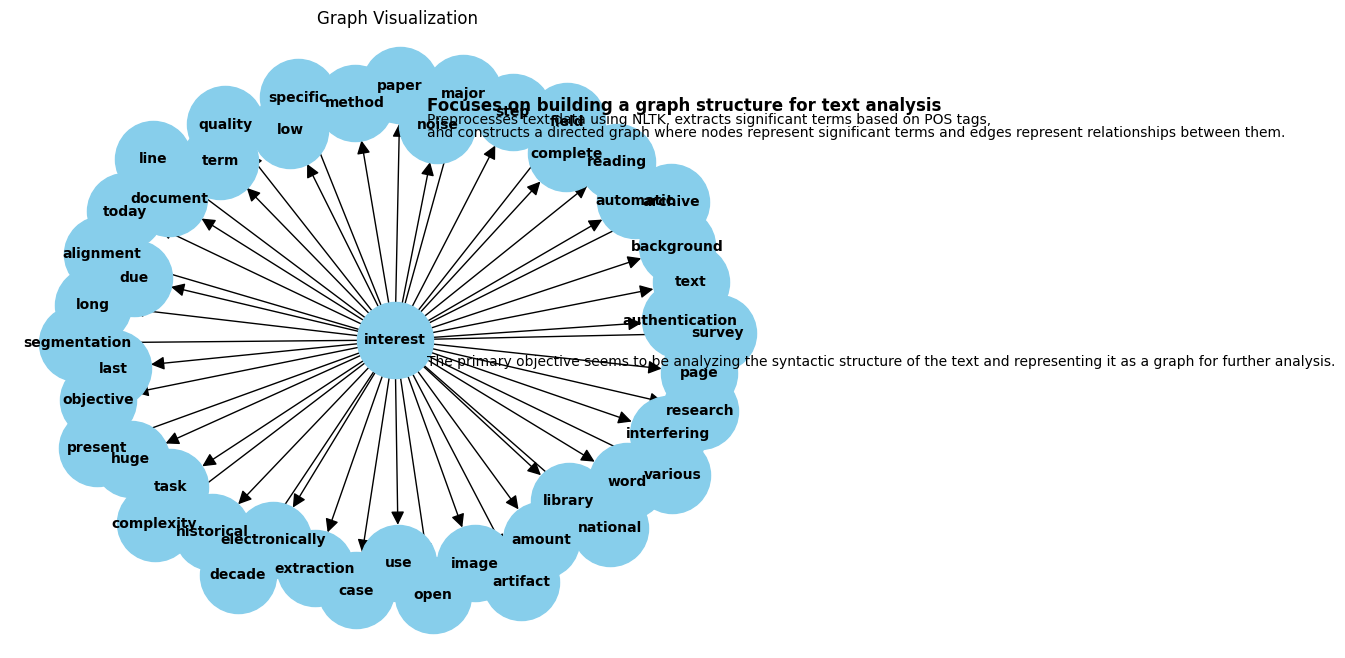

Graph for Abstract 1:
Nodes: [('amount', {'pos': 'nn'}), ('document', {'pos': 'jj'}), ('library', {'pos': 'nn'}), ('archive', {'pos': 'nn'}), ('reading', {'pos': 'nn'}), ('page', {'pos': 'nn'}), ('case', {'pos': 'nn'}), ('term', {'pos': 'nn'}), ('task', {'pos': 'nn'}), ('word', {'pos': 'nn'}), ('image', {'pos': 'nn'}), ('authentication', {'pos': 'nn'}), ('extraction', {'pos': 'nn'}), ('field', {'pos': 'nn'}), ('use', {'pos': 'nn'}), ('today', {'pos': 'nn'}), ('step', {'pos': 'nn'}), ('segmentation', {'pos': 'nn'}), ('line', {'pos': 'nn'}), ('quality', {'pos': 'nn'}), ('complexity', {'pos': 'nn'}), ('background', {'pos': 'nn'}), ('noise', {'pos': 'nn'}), ('artifact', {'pos': 'nn'}), ('text', {'pos': 'nn'}), ('research', {'pos': 'nn'}), ('paper', {'pos': 'nn'}), ('survey', {'pos': 'nn'}), ('method', {'pos': 'nn'}), ('decade', {'pos': 'nn'}), ('interest', {'pos': 'noun'}), ('huge', {'pos': 'jj'}), ('historical', {'pos': 'jj'}), ('various', {'pos': 'jj'}), ('national', {'pos': 'jj'}), ('el

In [ ]:
import pandas as pd
import spacy
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import networkx as nx
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load SpaCy NLP model for additional NLP tasks
nlp = spacy.load('en_core_web_sm')

# Load Dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

column_name = 'abstract'
if column_name not in data.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the dataset.")

# NLTK Preprocessing Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

def build_graph(text):
    # Initialize directed graph
    G = nx.DiGraph()

    # Preprocess text and get POS tags
    preprocessed_text, pos_tags = preprocess(text)

    # Add first node (noun phrase consisting of one or two words)
    first_noun = None
    for word, pos in pos_tags:
        if pos in ['NN', 'NNS'] and (first_noun is None or len(first_noun.split()) < 2):
            first_noun = word
            G.add_node(word, pos='noun')

    # Add subsequent nodes and edges
    if first_noun:
        for word, pos in pos_tags:
            if word != first_noun and pos in ['NN', 'NNS', 'JJ', 'RB']:  # Nouns, adjectives, or adverbs
                G.add_node(word, pos=pos.lower())
                G.add_edge(first_noun, word, relation=pos.lower())

    return G

# Function to visualize the graph
def visualize_graph(G):
    pos = nx.spring_layout(G)  # Layout for the graph
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Top section: Graph definition
    plt.text(0.1, 0.9, "Focuses on building a graph structure for text analysis", fontsize=12, fontweight='bold')
    plt.text(0.1, 0.85, "Preprocesses text data using NLTK, extracts significant terms based on POS tags,", fontsize=10)
    plt.text(0.1, 0.8, "and constructs a directed graph where nodes represent significant terms and edges represent relationships between them.", fontsize=10)

    # Graph visualization
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)

    # Bottom section: Graph structure
    plt.text(0.1, -0.1, "The primary objective seems to be analyzing the syntactic structure of the text and representing it as a graph for further analysis.", fontsize=10)

    plt.title("Graph Visualization")
    plt.show()

# Process abstracts (or the specified column)
for index, row in data.head(10).iterrows():  # Example: Process the first 10 entries
    abstract = row[column_name]

    preprocessed_text, _ = preprocess(abstract)

    # Graph Representation with NetworkX
    G = build_graph(preprocessed_text)

    # Visualize the graph
    visualize_graph(G)

    # Example output for demonstration
    print(f"Graph for Abstract {index+1}:")
    print("Nodes:", G.nodes(data=True))
    print("Edges:", G.edges(data=True))
    print("\n")

    # Break after the first abstract to keep the output manageable
    break


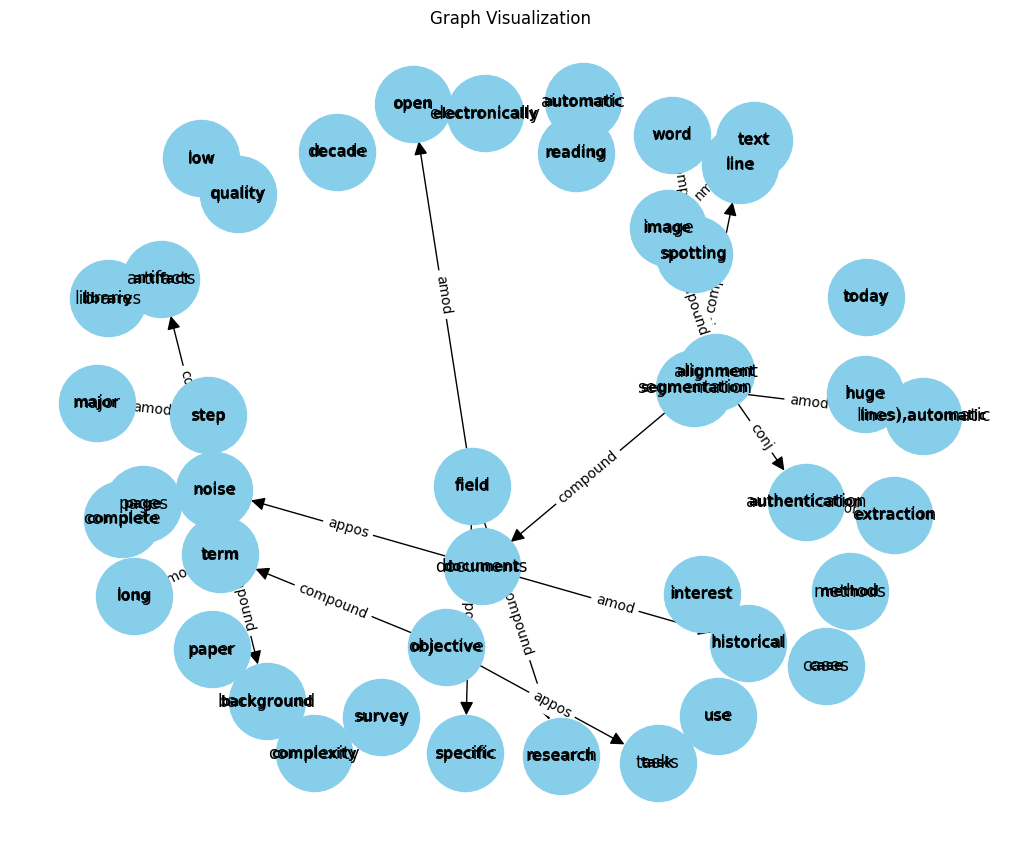

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Simulate a dataset
np.random.seed(42)
documents = [' '.join(np.random.choice(data['abstract'], size=np.random.randint(5, 15))) for _ in range(100)]
summaries = [" ".join(doc.split()[:np.random.randint(10, 20)]) + '...' for doc in documents]

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# Apply cleaning and tokenization
documents_cleaned = [clean_and_tokenize(doc) for doc in documents]
summaries_cleaned = [clean_and_tokenize(summary) for summary in summaries]

# Split dataset
train_docs, test_docs, train_summaries, test_summaries = train_test_split(documents_cleaned, summaries_cleaned, test_size=0.2, random_state=42)

# TF-IDF Based Graph Structure, SpaCy parsing
nlp = spacy.load('en_core_web_sm')

abstract = data['abstract'].head(10).tolist()

# Calculate TF-IDF for the titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abstract)
feature_names = vectorizer.get_feature_names_out()

# For simplicity, treat each abstract as a "document"
for abstract in abstract:
    doc = nlp(abstract)
    G = nx.DiGraph()

    # Simplified logic to add nodes based on the title's content
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
            G.add_node(token.lemma_, pos=token.pos_, label=token.text)  # Assigning node label
            for child in token.children:
                if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                    G.add_node(child.lemma_, pos=child.pos_, label=child.text)  # Assigning node label
                    G.add_edge(token.lemma_, child.lemma_, relation=child.dep_, label=child.dep_)  # Assigning edge label

    # Visualize the graph
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    node_labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Visualization")
    plt.show()
    break  # Remove or modify this based on your needs


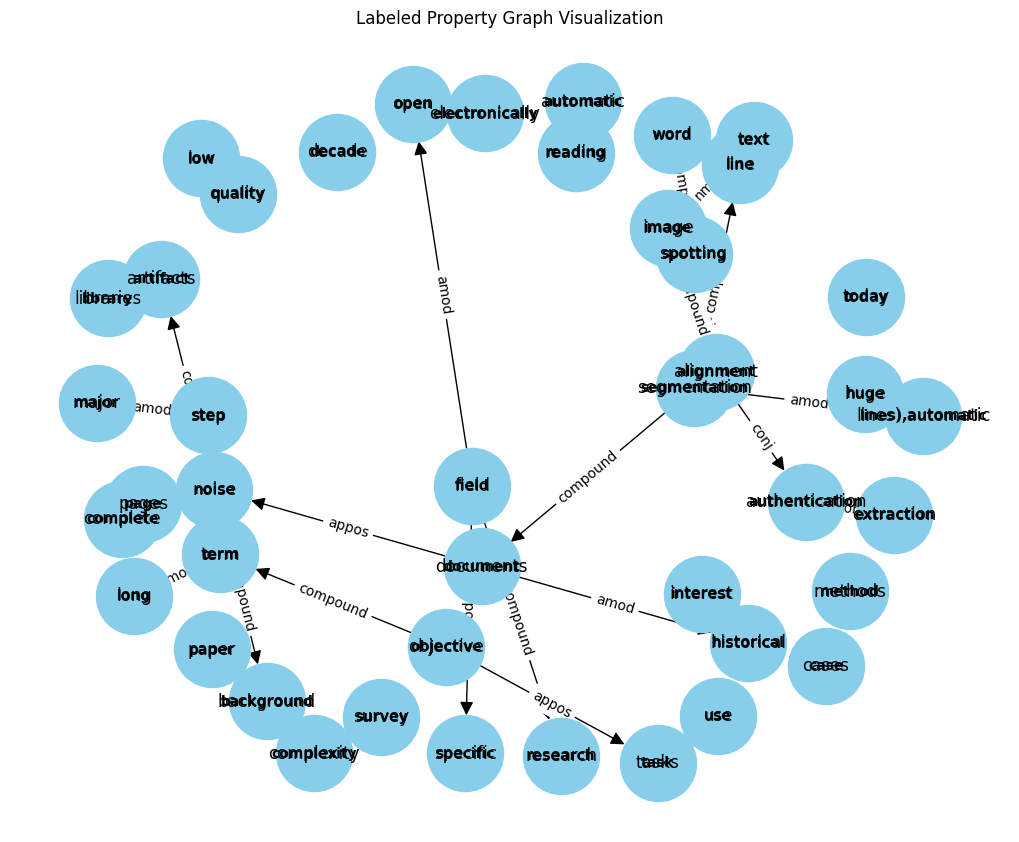

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Simulate a dataset
np.random.seed(42)
documents = [' '.join(np.random.choice(data['abstract'], size=np.random.randint(5, 15))) for _ in range(100)]
summaries = [" ".join(doc.split()[:np.random.randint(10, 20)]) + '...' for doc in documents]

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# Apply cleaning and tokenization
documents_cleaned = [clean_and_tokenize(doc) for doc in documents]
summaries_cleaned = [clean_and_tokenize(summary) for summary in summaries]

# Split dataset
train_docs, test_docs, train_summaries, test_summaries = train_test_split(documents_cleaned, summaries_cleaned, test_size=0.2, random_state=42)

# TF-IDF Based Graph Structure, SpaCy parsing
nlp = spacy.load('en_core_web_sm')

abstract = data['abstract'].head(10).tolist()

# Calculate TF-IDF for the titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abstract)
feature_names = vectorizer.get_feature_names_out()

# For simplicity, treat each abstract as a "document"
for abstract in abstract:
    doc = nlp(abstract)
    G = nx.DiGraph()

    # Simplified logic to add nodes based on the title's content
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
            # Adding nodes with labels
            G.add_node(token.lemma_, pos=token.pos_, label=token.text)
            for child in token.children:
                if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                    # Adding nodes with labels
                    G.add_node(child.lemma_, pos=child.pos_, label=child.text)
                    # Adding edges with labels
                    G.add_edge(token.lemma_, child.lemma_, relation=child.dep_, label=child.dep_)

    # Visualize the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    # Draw nodes with labels
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    node_labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    # Draw edges with labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Labeled Property Graph Visualization")
    plt.show()
    break  # Remove or modify this based on your needs


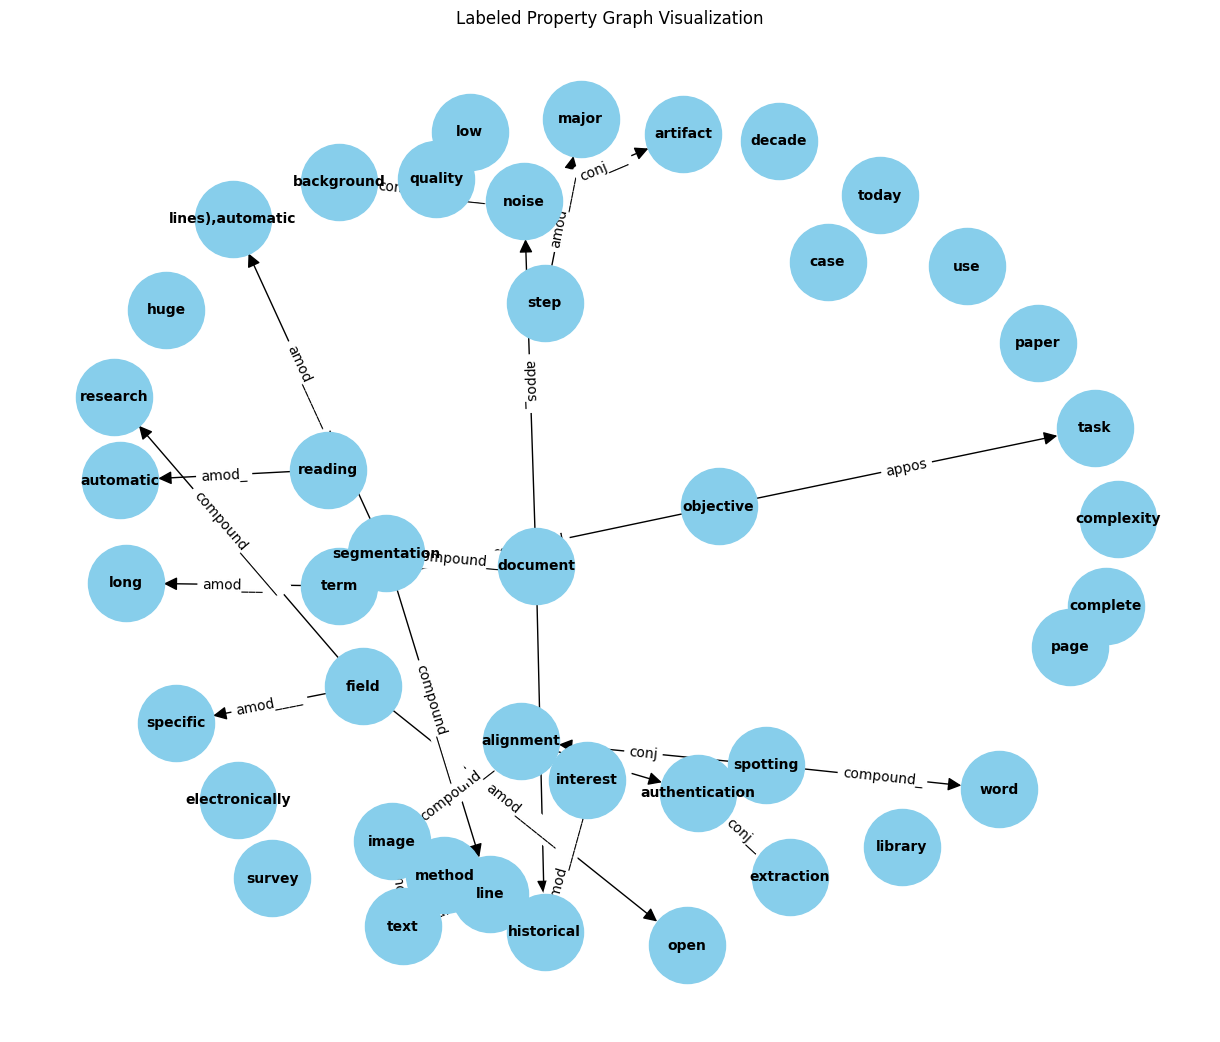

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Select one summary from the dataset
selected_summary = data['abstract'].iloc[0]

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# Apply cleaning and tokenization
summary_cleaned = clean_and_tokenize(selected_summary)

# TF-IDF Based Graph Structure, SpaCy parsing
nlp = spacy.load('en_core_web_sm')

# Treat the selected summary as a "document"
doc = nlp(selected_summary)
G = nx.DiGraph()

# Keep track of used node and edge labels
used_node_labels = set()
used_edge_labels = set()

# Add nodes and edges based on the summary content
for token in doc:
    if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
        # Adding nodes with unique labels
        node_label = token.text
        while node_label in used_node_labels:
            node_label += '_'
        G.add_node(token.lemma_, pos=token.pos_, label=node_label)
        used_node_labels.add(node_label)

        for child in token.children:
            if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                # Adding nodes with unique labels
                child_label = child.text
                while child_label in used_node_labels:
                    child_label += '_'
                G.add_node(child.lemma_, pos=child.pos_, label=child_label)
                used_node_labels.add(child_label)

                # Adding edges with unique labels
                edge_label = child.dep_
                while edge_label in used_edge_labels:
                    edge_label += '_'
                G.add_edge(token.lemma_, child.lemma_, relation=child.dep_, label=edge_label)
                used_edge_labels.add(edge_label)

# Visualize the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)
# Draw nodes with labels (but not displayed)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
# Assign labels to nodes without displaying them
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    G.nodes[node]['label'] = label
# Draw edges with labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Labeled Property Graph Visualization")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# TF-IDF Based Graph Structure, SpaCy parsing
nlp = spacy.load('en_core_web_sm')

# Initialize the graph
G = nx.DiGraph()

# Keep track of used node and edge labels
used_node_labels = set()
used_edge_labels = set()

# Iterate over each summary in the dataset
for summary in data['abstract']:
    # Apply cleaning and tokenization
    summary_cleaned = clean_and_tokenize(summary)

    # Treat the summary as a "document"
    doc = nlp(summary)

    # Add nodes and edges based on the summary content
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
            # Adding nodes with unique labels
            node_label = token.text
            while node_label in used_node_labels:
                node_label += '_'
            G.add_node(token.lemma_, pos=token.pos_, label=node_label)
            used_node_labels.add(node_label)

            # Check if the token has any children that meet the criteria
            for child in token.children:
                if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                    # Adding nodes with unique labels
                    child_label = child.text
                    while child_label in used_node_labels:
                        child_label += '_'
                    G.add_node(child.lemma_, pos=child.pos_, label=child_label)
                    used_node_labels.add(child_label)

                    # Adding edges with unique labels
                    edge_label = child.dep_
                    while edge_label in used_edge_labels:
                        edge_label += '_'
                    G.add_edge(token.lemma_, child.lemma_, relation=child.dep_, label=edge_label)
                    used_edge_labels.add(edge_label)

# Visualize the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)
# Draw nodes with labels
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
# Draw edges with labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Labeled Property Graph Visualization for All Summaries")
plt.show()
